<a href="https://colab.research.google.com/github/sid12153/TCS_iON_RIO125_ClassificationModel/blob/main/TCS_iON_RIO125_ClassificationModel_Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start Of Model.

# Loading, reading and displaying Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

Now we load our csv datafile and read it.

In [2]:
df=pd.read_csv('/content/1614141926_drugEffects.csv').drop(columns=['Unnamed: 0'])
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


# Exploratory Data Analysis

In [3]:
df[['urlDrugName','condition']].head(15)

,urlDrugName,condition
0,enalapril,management of congestive heart failure
1,ortho-tri-cyclen,birth prevention
2,ponstel,menstrual cramps
3,prilosec,acid reflux
4,lyrica,fibromyalgia
5,propecia,hair loss
6,vyvanse,add
7,elavil,depression
8,xanax,panic disorder
9,claritin,allergies


Bar Plot between Drugs used(urlDrugName) and their counts

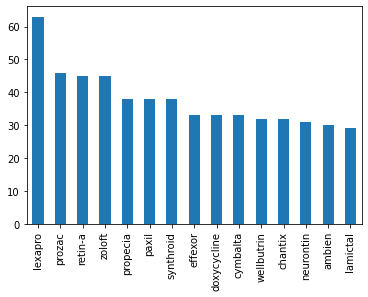

In [4]:
df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

Bar plot of Ratings of the drugs and count of ratings.

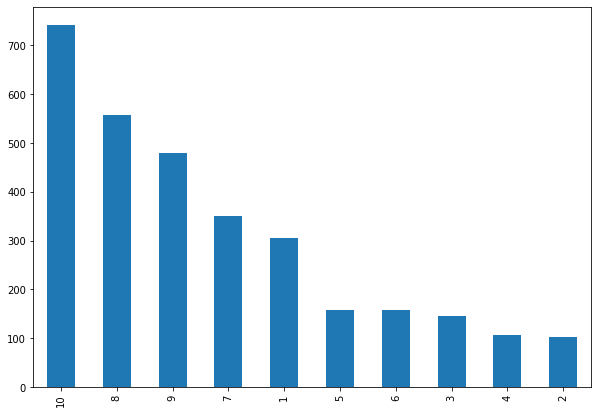

In [5]:
df['rating'].value_counts().head(15).plot(kind='bar')
plt.xlabel='rating'
plt.show()

Pie Chart depicting various Effectiveness results we have.

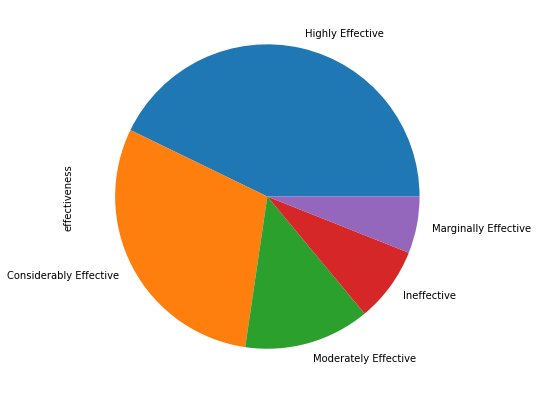

In [6]:
df['effectiveness'].value_counts().plot(kind='pie')
plt.show()

Bar plot depicting Condition to be treated and their count.

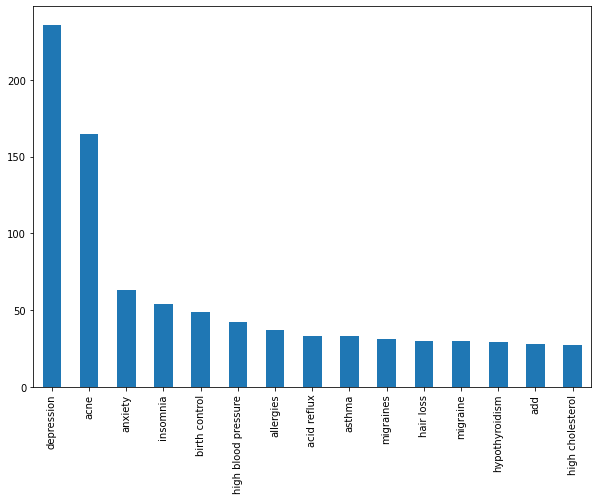

In [7]:
df['condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel='condition'
plt.show()

# Data Preprocessing

Separating features and labels

In [8]:
target = df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


Converting Categorical Data into Factors

In [9]:
cols = ['urlDrugName','effectiveness','condition']

for x in cols:
  df[x] = pd.factorize(df[x])[0]

target = pd.factorize(target)[0]

df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


Scaling the data for best fit

In [10]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])